### Analyzing Seaborn: "Tips"

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

### This portfolio demonstrates NumPy, Pandas, Seaborn, and Matplotlib functions in Data Science by using tips in  the Seaborn dataset. 

#### Displaying the first and last 10 data of the tips dataset to provide an overview of what the dataset contains:

In [4]:
tips.head(10)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
7,26.88,3.12,Male,No,Sun,Dinner,4
8,15.04,1.96,Male,No,Sun,Dinner,2
9,14.78,3.23,Male,No,Sun,Dinner,2


In [5]:
tips.tail(10)

,total_bill,tip,sex,smoker,day,time,size
234,15.53,3.00,Male,Yes,Sat,Dinner,2
235,10.07,1.25,Male,No,Sat,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
238,35.83,4.67,Female,No,Sat,Dinner,3
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


#### Describing the numerical data columns statistically by computing their common aggregate values:

In [6]:
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


#### Displaying total number of data available for dinners and lunches:

In [7]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

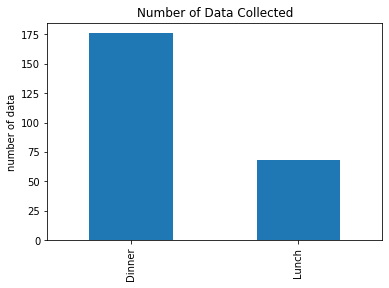

In [8]:
tips.time.value_counts().plot(kind='bar')
plt.ylabel('number of data')
plt.title('Number of Data Collected');

#### Percentage of dinner vs lunch data:

In [9]:
tips.time.value_counts(normalize = True)

Dinner    0.721311
Lunch     0.278689
Name: time, dtype: float64

### 72% of data are from dinners and 28% are lunches.

#### Displaying the number and percentage of males vs females in the data:

In [10]:
tips.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [11]:
tips.sex.value_counts(normalize = True)

Male      0.643443
Female    0.356557
Name: sex, dtype: float64

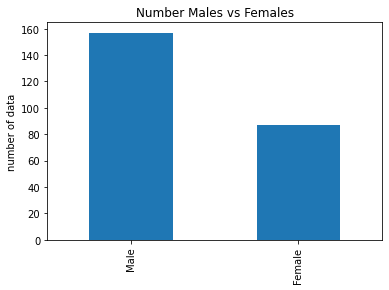

In [12]:
tips.sex.value_counts().plot(kind='bar')
plt.ylabel('number of data')
plt.title('Number Males vs Females');

### 64% of customers in the data are males, 36% are females

#### Displaying the number and percentage of smokers vs non-smokers in the data:

In [13]:
tips.smoker.value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [14]:
tips.smoker.value_counts(normalize = True)

No     0.618852
Yes    0.381148
Name: smoker, dtype: float64

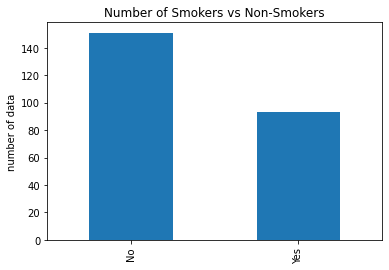

In [15]:
tips.smoker.value_counts().plot(kind='bar')
plt.ylabel('number of data')
plt.title('Number of Smokers vs Non-Smokers');

### 62% of customers in the data were non-smokers, 38% were smokers.

#### Displaying the mean total_bill by time and sex:

In [16]:
grp2=tips.groupby(['time', 'sex'])['total_bill'].mean().unstack()
grp2

sex,Male,Female
time,,
Lunch,18.048485,16.339143
Dinner,21.461452,19.213077


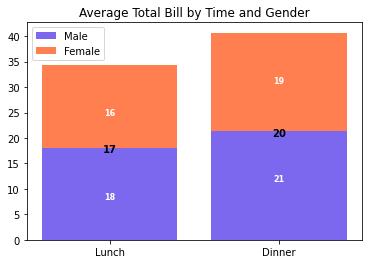

In [17]:
fig, ax= plt.subplots()

colors = ['mediumslateblue', 'coral']
bottom = np.zeros(len(grp2))

for i, col in enumerate(grp2.columns):
    ax.bar(grp2.index, grp2[col], bottom=bottom, label=col,
          color=colors[i])
    bottom += np.array(grp2[col])

totals = grp2.mean(axis=1)
y_offset = 0
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), 
           ha='center', weight='bold')
    
y_offset=-10

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
           bar.get_height() + bar.get_y()+ y_offset,
           round(bar.get_height()), ha = 'center',
           color='w', weight='bold', size=8)

ax.set_title('Average Total Bill by Time and Gender')
ax.legend()


### The average total bill is higher for dinner, and males spent more than females during both meal times.

#### Displaying total tip amounts by day and sex:

In [18]:
grp1= tips.groupby(['day', 'sex'])['tip'].sum().unstack()
grp1

sex,Male,Female
day,,
Thur,89.41,82.42
Fri,26.93,25.03
Sat,181.95,78.45
Sun,186.78,60.61


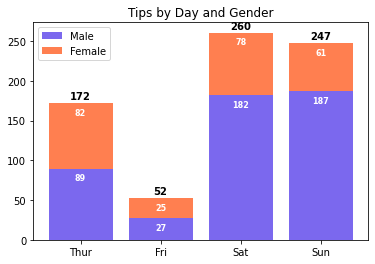

In [19]:
fig, ax= plt.subplots()

colors = ['mediumslateblue', 'coral']
bottom = np.zeros(len(grp1))

for i, col in enumerate(grp1.columns):
    ax.bar(grp1.index, grp1[col], bottom=bottom, label=col,
          color=colors[i])
    bottom += np.array(grp1[col])

totals = grp1.sum(axis=1)
y_offset = 5
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), 
           ha='center', weight='bold')
    
y_offset=-15

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
           bar.get_height() + bar.get_y()+ y_offset,
           round(bar.get_height()), ha = 'center',
           color='w', weight='bold', size=8)

ax.set_title('Tips by Day and Gender')
ax.legend()


### The total tip amount by males is more than females in every day of the data. This amount could be influenced by the higher number of male customers vs female customers in the data. 

### To appreciate the true value of the tip amount, it is useful to calculate the tip as a percentage of the total bill:

#### Using Numpy arrays to calculate mean tip percentage:

In [4]:
tot_bill = np.array(tips['total_bill'])
tip = np.array(tips['tip'])
tip_pct= 100 * tip/tot_bill
print(np.mean(tip_pct));

16.08025817225047


### Average tip percentage = 16.08%

#### Creating a column for calculated tip percentage:

In [5]:
tips['tip%'] = tip_pct

In [22]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip%
0,16.99,1.01,Female,No,Sun,Dinner,2,5.944673
1,10.34,1.66,Male,No,Sun,Dinner,3,16.054159
2,21.01,3.50,Male,No,Sun,Dinner,3,16.658734
3,23.68,3.31,Male,No,Sun,Dinner,2,13.978041
4,24.59,3.61,Female,No,Sun,Dinner,4,14.680765


#### Displaying average tip percentages by males vs females:

In [23]:
avg = tips.groupby(['sex'])['tip%'].aggregate('mean')
avg

sex
Male      15.765055
Female    16.649074
Name: tip%, dtype: float64

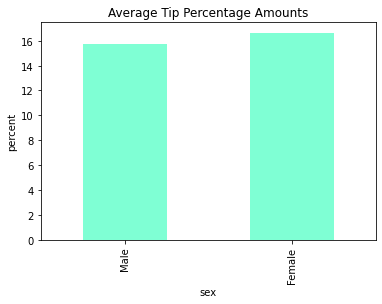

In [24]:
avg.plot.bar(color='aquamarine')
plt.ylabel('percent');
plt.title('Average Tip Percentage Amounts');

### Overall, females tip at a slightly higher percentage in relation to the total bill than males.

#### Displaying mean tip percentage amounts by time and sex:

In [25]:
grp3 = tips.groupby(['sex', 'time'])['tip%'].aggregate('mean').unstack()
grp3

time,Lunch,Dinner
sex,,
Male,16.608263,15.540653
Female,16.228493,16.932157


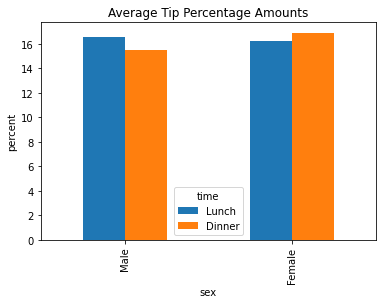

In [26]:
grp3.plot.bar()
plt.ylabel('percent');
plt.title('Average Tip Percentage Amounts');

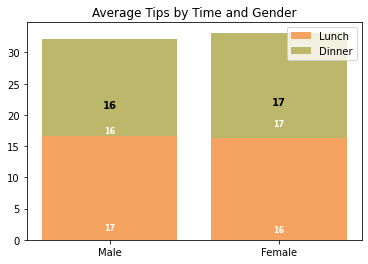

In [27]:
fig, ax= plt.subplots()

colors = ['sandybrown', 'darkkhaki']
bottom = np.zeros(len(grp3))

for i, col in enumerate(grp3.columns):
    ax.bar(grp3.index, grp3[col], bottom=bottom, label=col,
          color=colors[i])
    bottom += np.array(grp3[col])

totals = grp3.mean(axis=1)
y_offset = 5
for i, total in enumerate(totals):
    ax.text(totals.index[i], total + y_offset, round(total), 
           ha='center', weight='bold')
    
y_offset=-15

for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2,
           bar.get_height() + bar.get_y()+ y_offset,
           round(bar.get_height()), ha = 'center',
           color='w', weight='bold', size=8)

ax.set_title('Average Tips by Time and Gender')
ax.legend()


### In regards to the percentage of the tip to the total bill, males tip at a slightly higher percentage than females during lunch, while females tip slightly more than males during dinner. 

#### Displaying mean tip amounts by smoker status and sex: 

In [28]:
grp4= tips.groupby(['smoker', 'sex'])['tip%'].mean().unstack()
grp4

sex,Male,Female
smoker,,
Yes,15.277118,18.215035
No,16.066872,15.692097


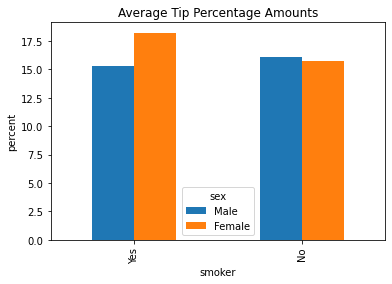

In [29]:
tips.groupby(['smoker', 'sex'])['tip%'].mean().unstack().plot.bar()
plt.ylabel('percent');
plt.title('Average Tip Percentage Amounts');

### Per tip percentage, smoker females are the higher tippers overall and non-smoker males tip slightly higher than non-smoker females. 

#### Displaying tip percentage amount by smokers vs non-smokers:

In [30]:
avg_smoker = avg = tips.groupby(['smoker'])['tip%'].aggregate('mean')
avg_smoker

smoker
Yes    16.319604
No     15.932846
Name: tip%, dtype: float64

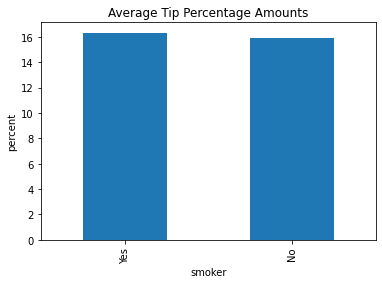

In [31]:
avg_smoker.plot.bar()
plt.ylabel('percent');
plt.title('Average Tip Percentage Amounts');

### Generally, smokers tip at a slightly higher percentage to the total bill than non-smokers.

#### Displaying tip amounts based on various indicator data:

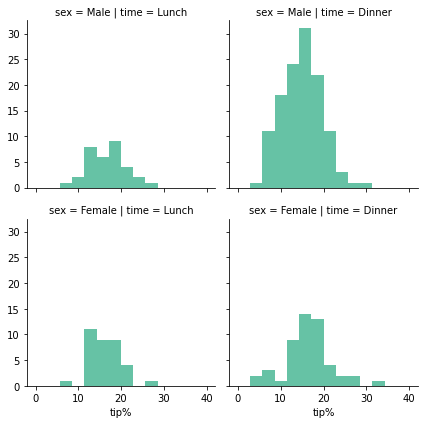

In [7]:
grid = sns.FacetGrid(tips, row='sex', col='time')
grid.map(plt.hist, 'tip%', bins=np.linspace(0, 40, 15))

sns.set_palette('Set2');

### Generally, tips fall within the 10-20% range. 

#### Displaying the relationship between total bill and tip%:

#### Using scatter plot:

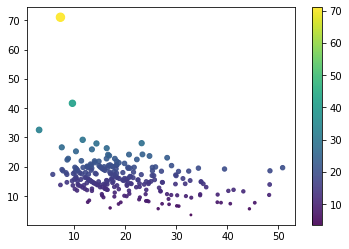

In [33]:
x= tips['total_bill']
y = tips['tip%']
colors=tips['tip%']
sizes=tips['tip%']
plt.scatter(x, y, c=colors, s=sizes, alpha=0.9, cmap='viridis')
plt.colorbar();

#### Using Seaborn library:

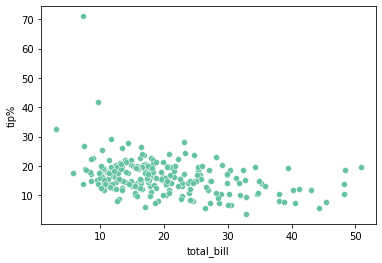

In [9]:
sns.scatterplot(x='total_bill', y='tip%', data = tips);

### Most total_bill amounts are within  $10 - 20. Most tip percentage are within 10-20%.

#### Displaying the tip percentages in relation to the total bill by gender:

<AxesSubplot:xlabel='total_bill', ylabel='tip%'>

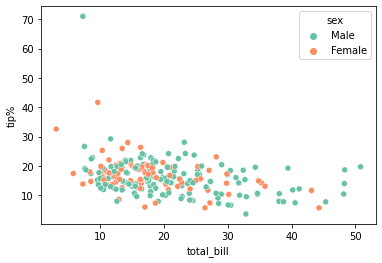

In [10]:
sns.scatterplot(x='total_bill', y='tip%', data = tips, hue = 'sex')

#### Displaying the tip percentages in relation to the total bill by meal time:

<AxesSubplot:xlabel='total_bill', ylabel='tip%'>

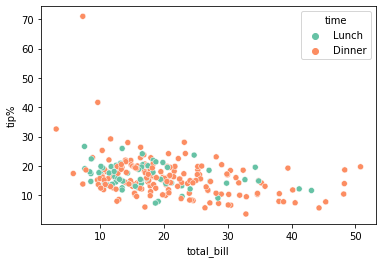

In [11]:
sns.scatterplot(x='total_bill', y='tip%', data = tips, hue = 'time')

#### Displaying the distribution of total bill by meal time:

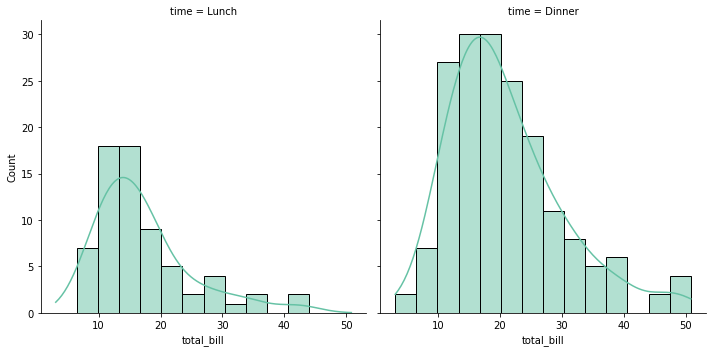

In [12]:
sns.displot(data=tips, x='total_bill', col='time', kde=True)

### Total bills for dinner are higher than lunch bills. 

#### Displaying distribution of tip percentage by meal time:

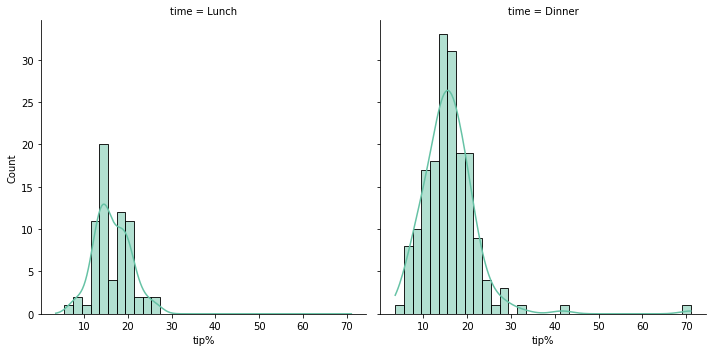

In [13]:
sns.displot(data=tips, x='tip%', col='time', kde=True)

#### Displaying the correlation and distribution for all the numeric variables by sex:

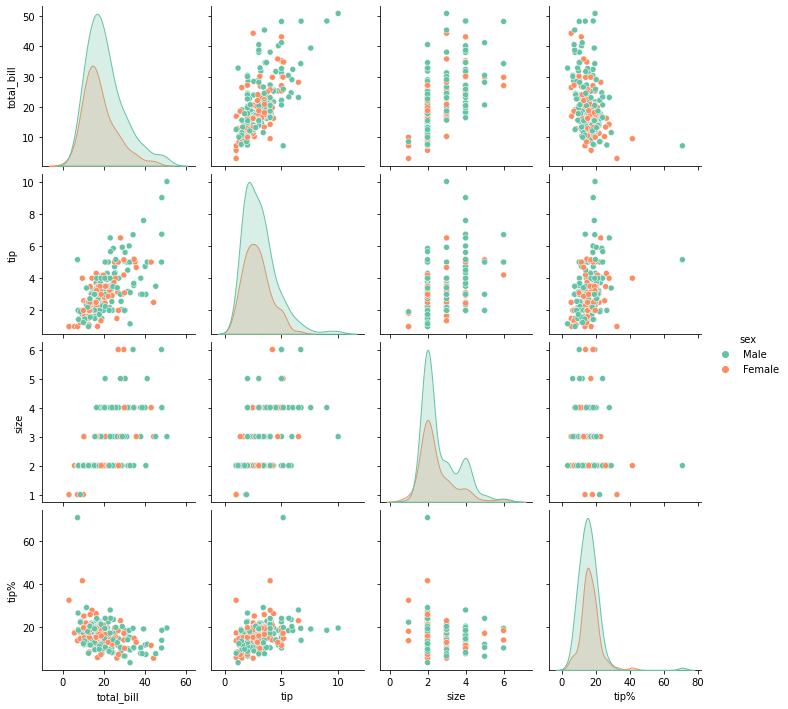

In [14]:
sns.pairplot(tips, hue ='sex')

#### Linear regression model

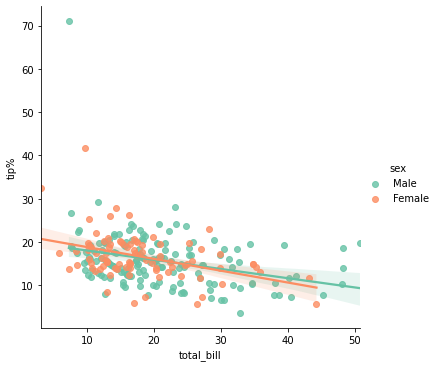

In [15]:
sns.lmplot(y='tip%', x = 'total_bill', hue='sex', data=tips);

#### Females pay a higher tip percentage on lower total bill amounts, while males appear to pay a higher tip percentage than females on higher total bill amounts. 

### Based on this dataset, there are more customers and higher total bills spent during dinner. This generates more tip revenue for the servers. On average, customers tip at a 15.5% - 17% of their total bill during both lunch and dinner. Smokers tip at a slightly higher percentage than non-smokers. Females tip slightly higher than males during dinner, and males tip slightly higher than females during lunch. However, in general, females tip higher than males. This data can be valuable for restaurants to take into consideration in planning for their staffing levels and hours of service. 